In [16]:
!pip install pandas
!pip install textblob
!pip install nltk
!pip install scikit-learn
!pip install matplotlib
!pip install imbalanced-learn
!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
# Import the necessary libraries
import pandas as pd
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import re
def remove_caracteres_especiais(texto):
    return re.sub(r'[^\w\s]', '', texto)

In [17]:
# Load the data from the CSV file
df = pd.read_csv('../sentimentos.csv')
df.head()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,Crashed too often. Confusing. It shows for ex....,Ayşegül Apaydiner,1,1,0,0,sentimentos
1,It only looks like the legit app but does none...,Harold Galbreath,1,1,0,0,sentimentos
2,"I have a limited data plan, so I figured that ...",A Google user,2,1,0,0,sentimentos
3,This app is not working at all. As soon as I c...,Shounak Basu,1,1,0,0,sentimentos
4,"Google GO apps are garbage. They load slow, cr...",Some Guy,1,1,0,0,sentimentos


In [5]:
df['Review'] = df['Review'].apply(lambda x: remove_caracteres_especiais(str(x))).fillna('')

In [6]:
# Carry out sentiment analysis on the 'Review' column
df['sentiment'] = df['Review'].apply(lambda text: TextBlob(str(text)).sentiment.polarity)

In [7]:
# Categorize the sentiment into negative, neutral, or positive
df['sentiment_category'] = pd.cut(df['sentiment'], bins=3, labels=["negative", "neutral", "positive"])

In [8]:
# Define sentiment based on rating
def sentiment_from_rating(rating):
    if rating <= 2:
        return "negative"
    elif rating == 3:
        return "neutral"
    else:
        return "positive"

In [9]:
df['rating_sentiment'] = df['Rating'].apply(sentiment_from_rating)

In [10]:
# Define the stop words
stop_words = set(stopwords.words('english'))

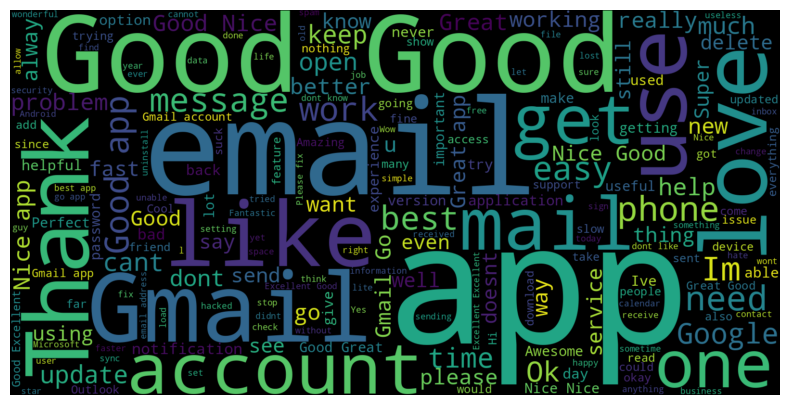

In [11]:
# Generate a word cloud to visualize the most frequently appearing words
wordcloud = WordCloud(stopwords=stop_words, background_color="black", width=1600, height=800).generate(" ".join(df['Review'].astype(str)))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment_category'>

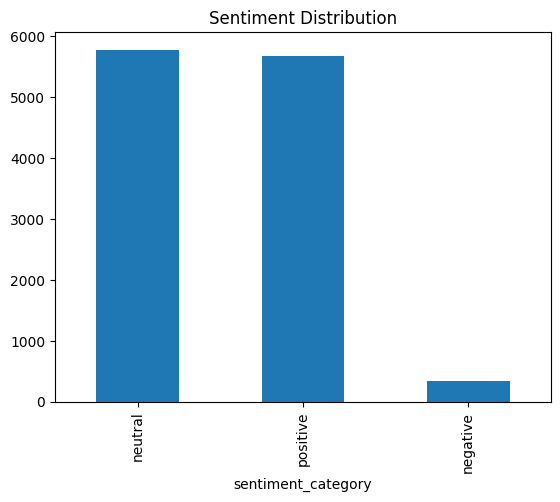

In [12]:
# Display the distribution of sentiments in a bar chart
df['sentiment_category'].value_counts().plot(kind='bar', title='Sentiment Distribution')

In [13]:
# Calculate accuracy
accuracy = accuracy_score(df['rating_sentiment'], df['sentiment_category'])
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 49.02%


In [14]:
# Function to evaluate sentiment of a given text
def evaluate_sentiment(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment < -0.33:
        return "negative"
    elif sentiment > 0.33:
        return "positive"
    else:
        return "neutral"

In [15]:
# Test the function
print(evaluate_sentiment("I absolutely love this app!"))
print(evaluate_sentiment("I completely hate this app!"))
print(evaluate_sentiment("This app is somewhat decent."))

positive
negative
neutral
